In [15]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import seaborn as sns


df = pd.read_csv("C:/Users/Lenovo/Documents/GitHub/Brain-Tumor-Datection/Created Dataset/var_skew_dataset.csv")

df

,Mean,std,Variance,Skewness,Entropy,RMS,Kurtios,HMI1,HMI2,HMI3,...,homogeneity4,energy1,energy2,energy3,energy4,correlation1,correlation2,correlation3,correlation4,Class
0,55.212544,46.056565,2121.207208,0.370450,5.375762,9.302612,-0.628678,2.752905,8.030957,11.070417,...,0.513325,0.177499,0.172328,0.180325,0.171641,0.969317,0.959636,0.974818,0.958198,0
1,76.037273,79.565990,6330.746828,0.585233,5.781641,7.635726,-0.877843,2.904895,7.803627,12.448359,...,0.432991,0.230150,0.221221,0.232777,0.221043,0.969677,0.958555,0.973180,0.957760,0
2,53.652053,59.587603,3550.682395,1.574931,4.946379,10.302398,2.218936,2.779911,7.267831,10.447366,...,0.490227,0.232071,0.220649,0.233649,0.221646,0.949499,0.932350,0.958399,0.931763,0
3,49.231160,42.645217,1818.614523,0.483434,6.123446,10.533521,-1.392569,2.778616,7.928608,10.892414,...,0.450451,0.374133,0.365637,0.379210,0.367641,0.913667,0.891387,0.927097,0.891294,0
4,77.261385,83.705507,7006.611845,0.747321,6.017668,7.935202,-0.774676,2.996775,7.602490,11.633094,...,0.444437,0.312793,0.304938,0.317934,0.302303,0.923784,0.898480,0.934894,0.898350,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5212,55.537216,41.476325,1720.285572,0.500769,6.681584,9.934108,-0.125073,2.678192,8.030136,10.921777,...,0.354122,0.149783,0.145493,0.154335,0.144780,0.932639,0.914916,0.949625,0.912128,1
5213,58.451622,42.845989,1835.778749,0.488612,6.740698,10.103457,-0.062257,2.700193,8.071390,10.813083,...,0.334873,0.136611,0.132942,0.141475,0.131985,0.936218,0.921140,0.955264,0.920016,1
5214,45.893677,33.173744,1100.497301,0.478187,6.370771,9.474798,0.096858,2.585893,7.683718,10.163987,...,0.321362,0.081568,0.077379,0.082941,0.076869,0.933455,0.915585,0.950032,0.910542,1
5215,41.703392,36.594254,1339.139410,1.058489,6.356158,9.738114,1.184672,2.608306,8.878155,11.275747,...,0.312610,0.100671,0.096011,0.102649,0.095976,0.947402,0.926110,0.953305,0.926715,1


In [8]:
df.loc[(df['Class'] ==0), 'Class'] = 'No tumor'
df.loc[(df['Class'] ==1), 'Class'] = 'Pituitary'
df.loc[(df['Class'] ==2), 'Class'] = 'Meningioma'
df.loc[(df['Class'] ==3), 'Class'] = 'Glioma'

Text(0, 0.5, 'Amount')

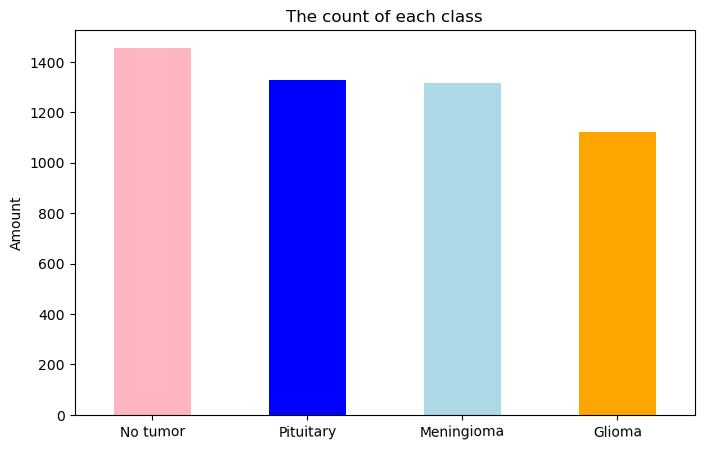

In [11]:
#plotting bar chart.
plt.figure(figsize=(8,5))
fig = df.Class.value_counts().plot(kind = 'bar', color=['lightpink', "blue", 'lightblue', 'orange'])
fig.set_xticklabels(labels=["No tumor", 'Pituitary', 'Meningioma', 'Glioma'], rotation=0.9);
plt.title("The count of each class")
plt.ylabel("Amount")

<AxesSubplot:ylabel='Class'>

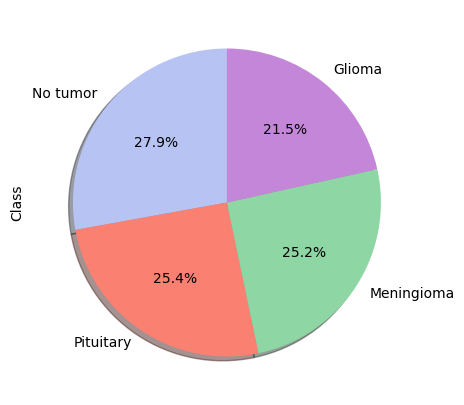

In [14]:
#visualizing in Pie chart
plt.figure(figsize=(5,5))
labels = "No tumor", 'Pituitary', 'Meningioma', 'Glioma'

df['Class'].value_counts().plot.pie( autopct='%1.1f%%', startangle = 90,  shadow=True, labels=labels, 
                                          colors=['#B7C3F3','salmon', '#8ED6A3', '#C486D8'])

<Figure size 2000x1000 with 0 Axes>

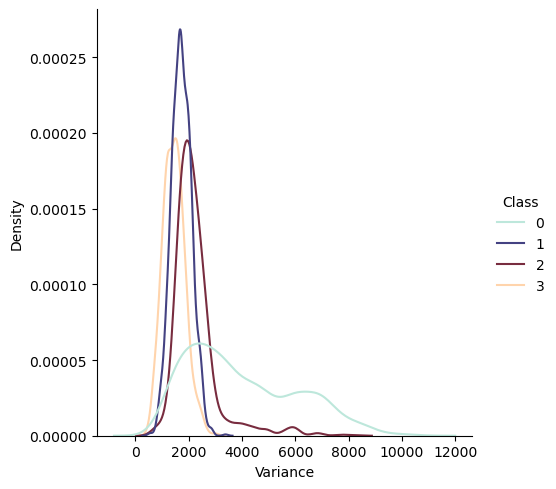

In [18]:
plt.figure(figsize=(20,10))
sns.displot(x='Variance', hue='Class', data=df, palette='icefire', kind = 'kde')

Text(10.460704861111113, 0.5, 'Skewness')

<Figure size 1000x1000 with 0 Axes>

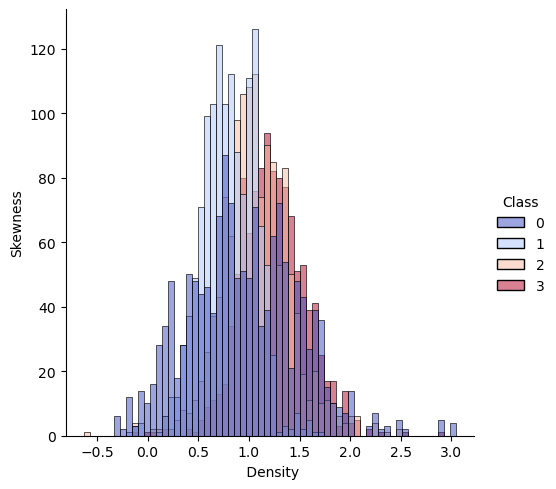

In [31]:
plt.figure(figsize=(10,10))
sns.displot(data=df, x='Skewness', palette='coolwarm', hue='Class')
plt.xlabel(' Density')
plt.ylabel('Skewness')

<Figure size 2000x1000 with 0 Axes>

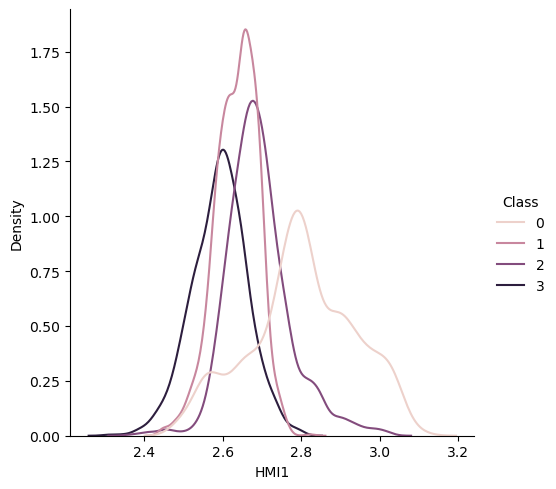

In [34]:
plt.figure(figsize=(20,10))
sns.displot(x='HMI1', hue='Class', data=df, kind = 'kde')

<Figure size 2000x1000 with 0 Axes>

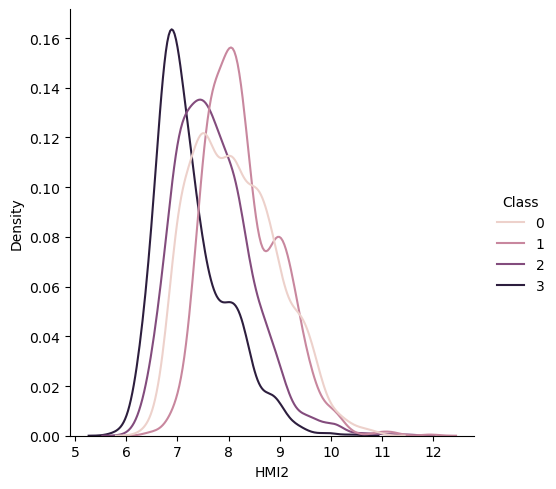

In [35]:
plt.figure(figsize=(20,10))
sns.displot(x='HMI2', hue='Class', data=df, kind = 'kde')

<Figure size 2000x1000 with 0 Axes>

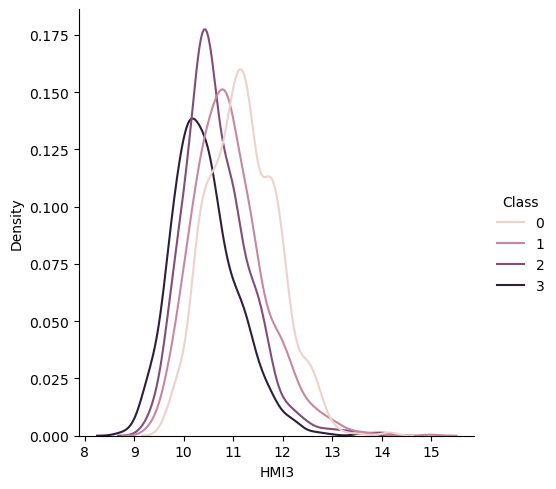

In [36]:
plt.figure(figsize=(20,10))
sns.displot(x='HMI3', hue='Class', data=df, kind = 'kde')

<Figure size 2000x1000 with 0 Axes>

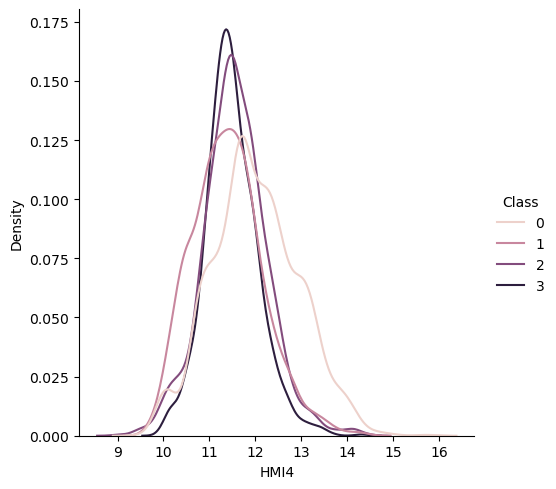

In [37]:
plt.figure(figsize=(20,10))
sns.displot(x='HMI4', hue='Class', data=df, kind = 'kde')

<Figure size 2000x1000 with 0 Axes>

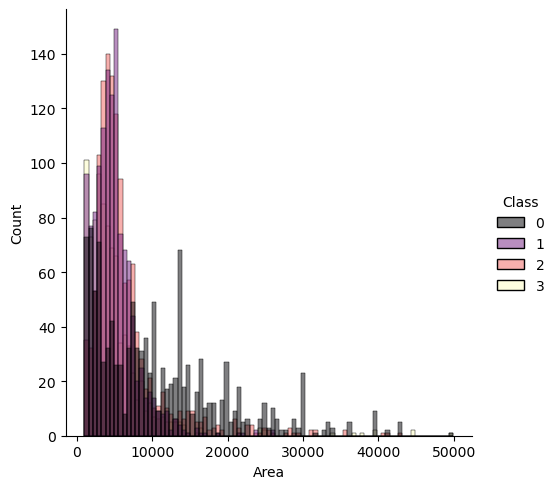

In [30]:
plt.figure(figsize=(20,10))
sns.displot(x='Area', hue='Class', data=df, palette='magma')

Text(10.460704861111113, 0.5, 'Convex Area')

<Figure size 1000x1000 with 0 Axes>

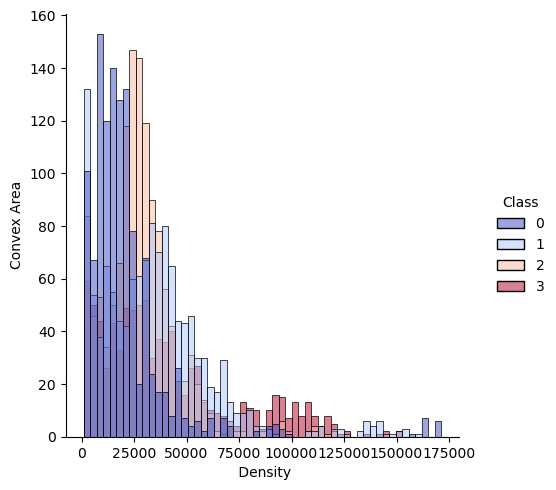

In [38]:
plt.figure(figsize=(10,10))
sns.displot(data=df, x='Convex Area', palette='coolwarm', hue='Class')
plt.xlabel(' Density')
plt.ylabel('Convex Area')

## The correlation between Target and Features

<AxesSubplot:>

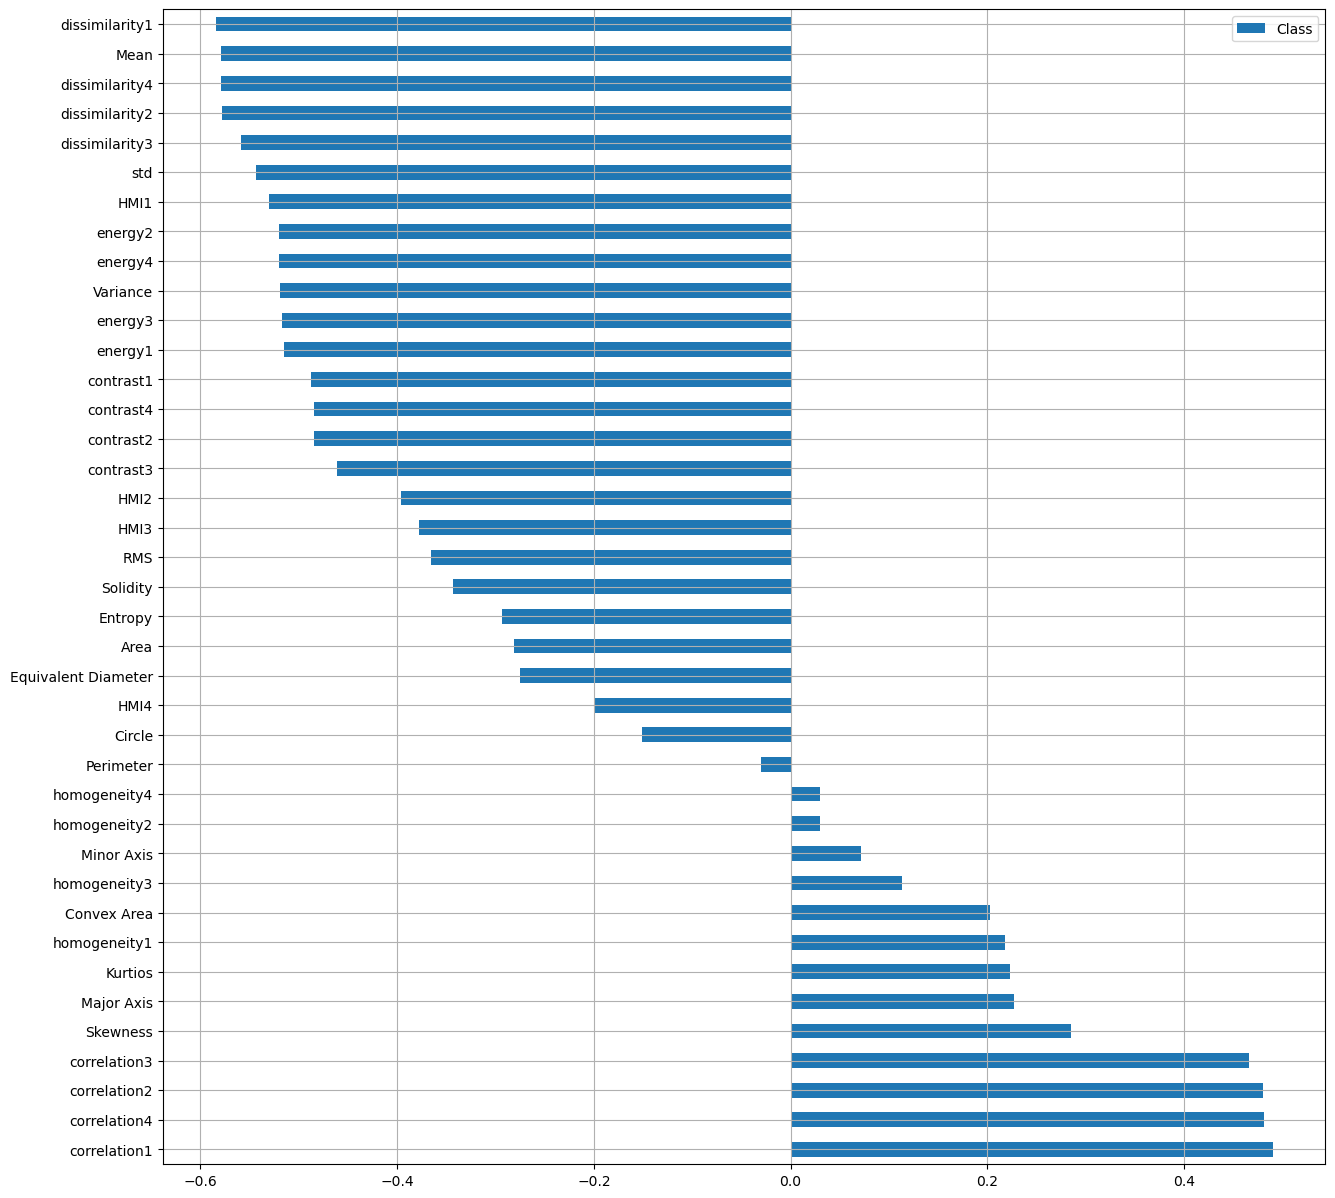

In [26]:
#Correlation check to price Ranges
corr = pd.DataFrame(df.corr()['Class']).drop('Class',axis=0).sort_values(by = 'Class',ascending=False)
corr.plot(kind='barh',grid=True,figsize=(15,15))